# **Operaciones de Cadenas Vectorizadas**

In [2]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [4]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [6]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s if s is None else s.capitalize() for s in data]

['Peter', 'Paul', None, 'Mary', 'Guido']

In [8]:
import pandas as pd
names = pd.Series(data)
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

# **Tablas de Métodos de Cadenas de Pandas**

In [11]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

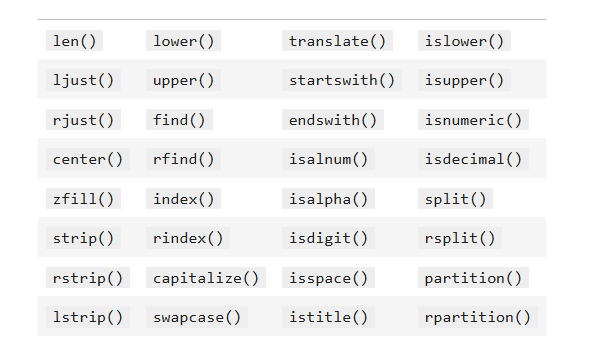

In [14]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [16]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [18]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [20]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [22]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [24]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

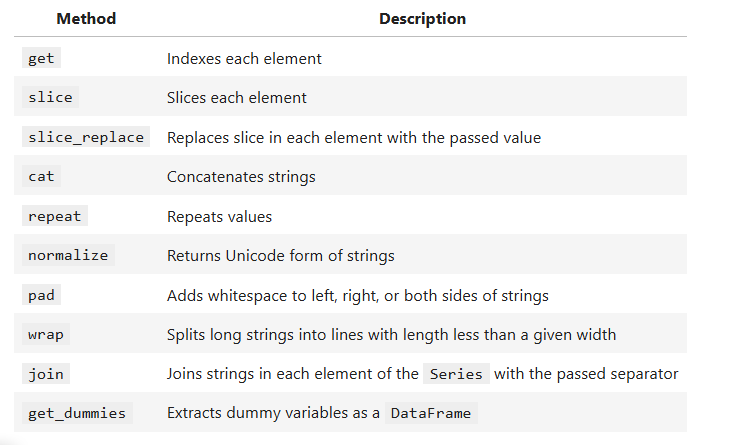

In [27]:

monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [29]:
monte.str.split().str[-1]

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

## 
Indicator variables

In [33]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [35]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# 3.10 - 3.13 Trabajo con series de tiempo

In [38]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

In [41]:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

In [43]:
date.strftime('%A')

'Sunday'

In [45]:
import numpy as np
date = np.array('2021-07-04', dtype=np.datetime64)
date

array('2021-07-04', dtype='datetime64[D]')

In [47]:

date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

In [49]:

np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [51]:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

In [53]:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

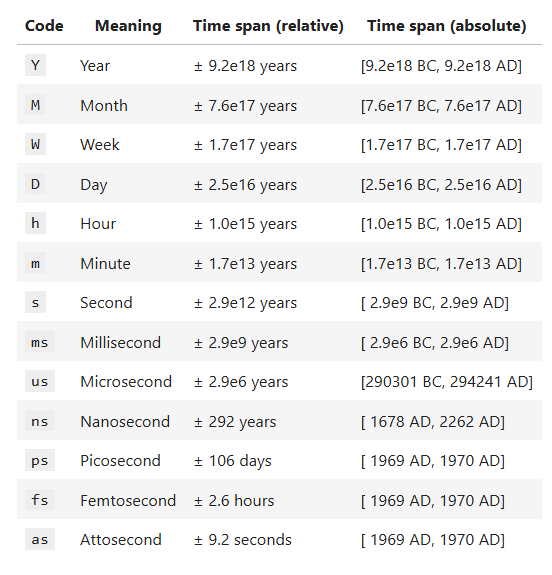

In [56]:
import pandas as pd
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [58]:
date.strftime('%A')

'Sunday'

In [60]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

In [62]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [64]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [66]:

data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

## Pandas Time Series Data Structures

In [69]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
                       '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [71]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [73]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [75]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [77]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [79]:
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\andyl\AppData\Local\Temp\ipykernel_3156\3521404607.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [81]:

pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [83]:
pd.timedelta_range(0, periods=6, freq='H')

C:\Users\andyl\AppData\Local\Temp\ipykernel_3156\1860625161.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='h')

In [85]:
pd.timedelta_range(0, periods=6, freq="2H30T")

C:\Users\andyl\AppData\Local\Temp\ipykernel_3156\22847273.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq="2H30T")
C:\Users\andyl\AppData\Local\Temp\ipykernel_3156\22847273.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=6, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150min')

In [87]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

In [93]:
 url = ('https://raw.githubusercontent.com/jakevdp/'
        'bicycle-data/main/FremontBridge.csv')
!curl -O {url}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4585k  100 4585k    0     0  5056k      0 --:--:-- --:--:-- --:--:-- 5061k


In [95]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

C:\Users\andyl\AppData\Local\Temp\ipykernel_3156\107446932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [97]:
data.columns = ['Total', 'East', 'West']

In [99]:
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


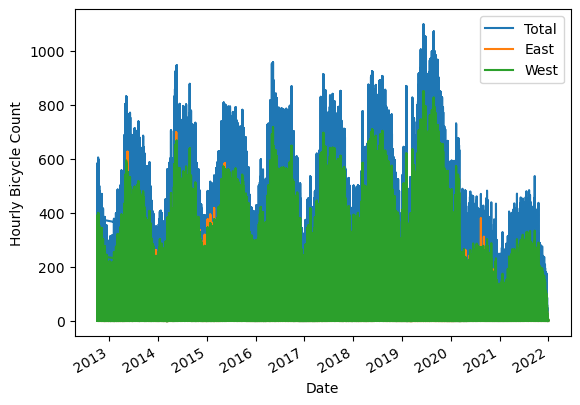

In [113]:
import matplotlib.pyplot as plt
data.plot()
plt.ylabel('Hourly Bicycle Count');

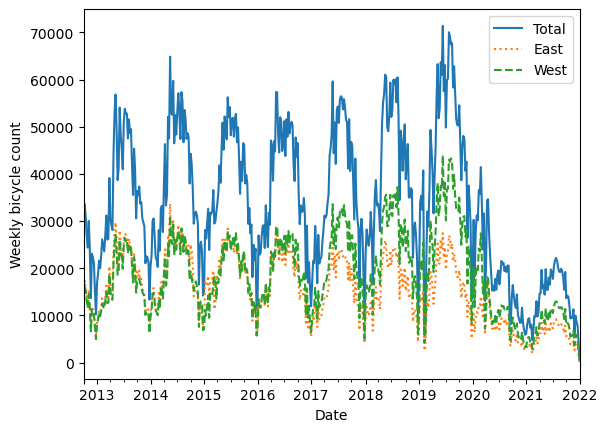

In [114]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count');

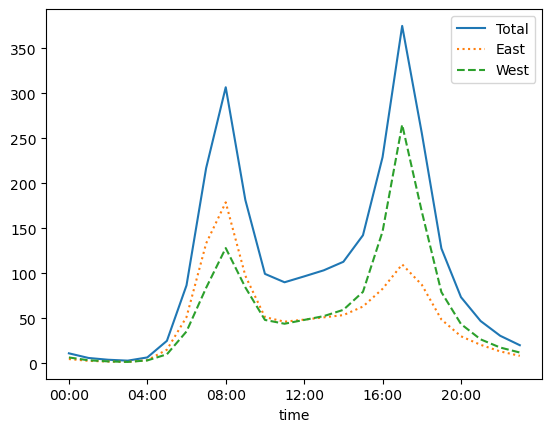

In [115]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--']);

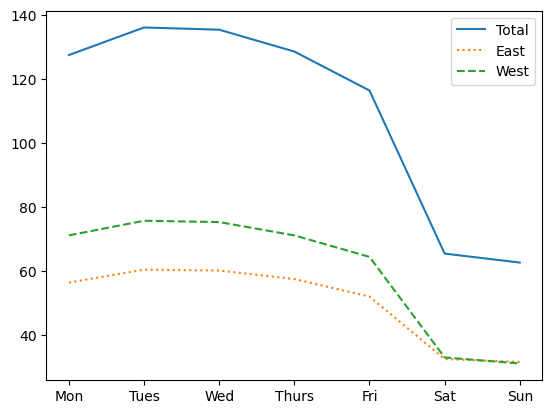

In [117]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--']);

In [119]:

weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()


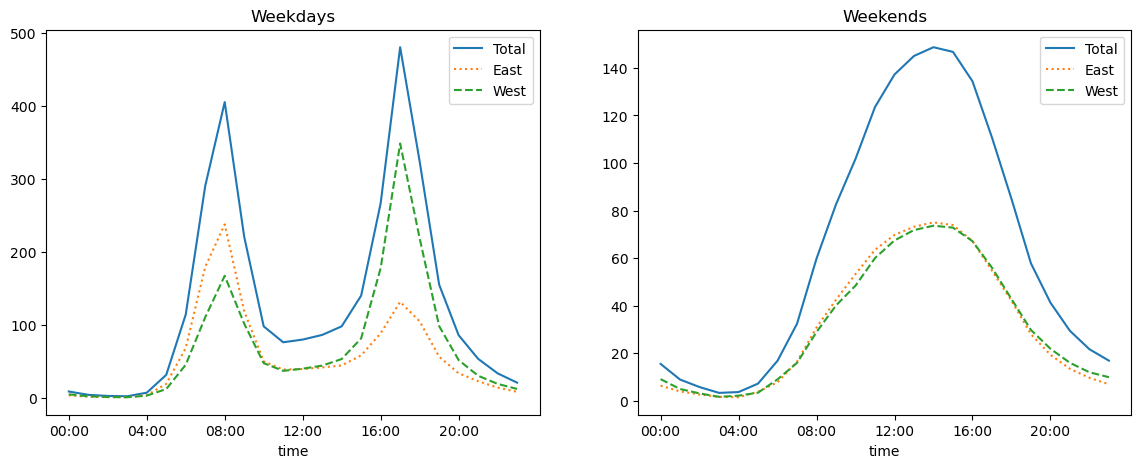

In [123]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                            xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                            xticks=hourly_ticks, style=['-', ':', '--']);

# 3.12

# High-Performance Pandas

In [127]:
import numpy as np
rng = np.random.default_rng(42)
x = rng.random(1000000)
y = rng.random(1000000)
%timeit x + y

3.16 ms ± 224 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [133]:
%timeit 
np.fromiter((xi + yi for xi, yi in zip(x, y)),
                    dtype=x.dtype, count=len(x))

array([1.47276651, 0.90040381, 0.87388613, ..., 0.77123543, 1.01142688,
       1.13417028])

In [135]:
mask = (x > 0.5) & (y < 0.5)

In [137]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [139]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.all(mask == mask_numexpr)

True

## pandas.eval for Efficient Operations

In [142]:
import pandas as pd
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(rng.random((nrows, ncols)))
                      for i in range(4))

In [144]:
%timeit 
df1 + df2 + df3 + df4

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.894619,2.350323,2.478404,2.882839,1.343365,1.786434,2.018079,1.987882,1.735450,2.465074,...,1.421749,2.467428,1.879926,2.541935,1.944373,1.107981,1.164714,1.218824,1.826986,1.768287
1,2.639100,2.094697,1.557960,1.780941,1.830018,2.329232,1.231432,1.396454,2.155633,0.942625,...,1.795405,2.723724,1.930859,2.627139,2.206071,1.400315,1.309764,1.844379,1.097728,1.967507
2,1.721849,1.783487,1.823500,1.815596,1.705560,1.581237,2.064727,2.455018,1.240429,2.224491,...,1.706844,2.797325,2.188354,2.324506,1.371082,2.374894,1.794025,1.752218,2.953386,1.836734
3,1.625072,2.173571,0.987042,3.065283,2.585640,1.556933,2.184181,1.968105,2.251560,1.903023,...,2.107717,2.990492,1.863779,2.628333,1.784315,2.597918,2.073985,2.419915,2.845571,1.463960
4,2.166188,2.905083,1.881283,2.200816,3.151786,1.163403,1.296112,1.081093,1.721385,1.290778,...,2.309246,2.270861,2.552256,3.011268,2.576969,2.579716,2.280400,1.183832,2.946427,2.056846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.469060,1.944152,1.464401,1.554039,2.052452,1.719286,2.299570,1.783415,1.694976,2.036992,...,2.743753,2.413405,1.769985,2.077083,1.421381,1.672501,2.164880,2.417685,2.394320,1.325424
99996,1.613260,2.357866,2.600431,2.142335,3.100055,2.423109,1.782654,3.142578,2.317951,2.182345,...,2.260197,2.369591,1.531543,2.091696,1.110596,2.325127,2.961379,2.178663,2.988712,2.006969
99997,2.710291,1.639400,0.845316,2.859595,1.363385,1.401434,1.242514,2.843363,1.919517,1.235176,...,3.233900,2.189463,2.025656,1.436872,1.593415,1.912365,2.208321,3.380556,1.891715,2.542389
99998,1.888056,2.454579,1.248855,0.990096,2.601651,0.876812,1.730572,2.463358,1.834659,0.949414,...,1.526910,1.147391,1.169447,1.725887,1.964907,1.667066,2.265025,2.822579,2.700696,2.228108


In [146]:
%timeit 
pd.eval('df1 + df2 + df3 + df4')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.894619,2.350323,2.478404,2.882839,1.343365,1.786434,2.018079,1.987882,1.735450,2.465074,...,1.421749,2.467428,1.879926,2.541935,1.944373,1.107981,1.164714,1.218824,1.826986,1.768287
1,2.639100,2.094697,1.557960,1.780941,1.830018,2.329232,1.231432,1.396454,2.155633,0.942625,...,1.795405,2.723724,1.930859,2.627139,2.206071,1.400315,1.309764,1.844379,1.097728,1.967507
2,1.721849,1.783487,1.823500,1.815596,1.705560,1.581237,2.064727,2.455018,1.240429,2.224491,...,1.706844,2.797325,2.188354,2.324506,1.371082,2.374894,1.794025,1.752218,2.953386,1.836734
3,1.625072,2.173571,0.987042,3.065283,2.585640,1.556933,2.184181,1.968105,2.251560,1.903023,...,2.107717,2.990492,1.863779,2.628333,1.784315,2.597918,2.073985,2.419915,2.845571,1.463960
4,2.166188,2.905083,1.881283,2.200816,3.151786,1.163403,1.296112,1.081093,1.721385,1.290778,...,2.309246,2.270861,2.552256,3.011268,2.576969,2.579716,2.280400,1.183832,2.946427,2.056846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2.469060,1.944152,1.464401,1.554039,2.052452,1.719286,2.299570,1.783415,1.694976,2.036992,...,2.743753,2.413405,1.769985,2.077083,1.421381,1.672501,2.164880,2.417685,2.394320,1.325424
99996,1.613260,2.357866,2.600431,2.142335,3.100055,2.423109,1.782654,3.142578,2.317951,2.182345,...,2.260197,2.369591,1.531543,2.091696,1.110596,2.325127,2.961379,2.178663,2.988712,2.006969
99997,2.710291,1.639400,0.845316,2.859595,1.363385,1.401434,1.242514,2.843363,1.919517,1.235176,...,3.233900,2.189463,2.025656,1.436872,1.593415,1.912365,2.208321,3.380556,1.891715,2.542389
99998,1.888056,2.454579,1.248855,0.990096,2.601651,0.876812,1.730572,2.463358,1.834659,0.949414,...,1.526910,1.147391,1.169447,1.725887,1.964907,1.667066,2.265025,2.822579,2.700696,2.228108


In [148]:

np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

In [150]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.integers(0, 1000, (100, 3)))
                           for i in range(5))

In [152]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [154]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [156]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [158]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

### Object attributes and indices

In [161]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

In [163]:
df = pd.DataFrame(rng.random((1000, 3)), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.850888,0.966709,0.958690
1,0.820126,0.385686,0.061402
2,0.059729,0.831768,0.652259
3,0.244774,0.140322,0.041711
4,0.818205,0.753384,0.578851


In [165]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

## 
Assignment in DataFrame.eval

In [168]:
df.head()

,A,B,C
0,0.850888,0.966709,0.958690
1,0.820126,0.385686,0.061402
2,0.059729,0.831768,0.652259
3,0.244774,0.140322,0.041711
4,0.818205,0.753384,0.578851


In [170]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.850888,0.966709,0.958690,1.895916
1,0.820126,0.385686,0.061402,19.638139
2,0.059729,0.831768,0.652259,1.366782
3,0.244774,0.140322,0.041711,9.232370
4,0.818205,0.753384,0.578851,2.715013


In [172]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.850888,0.966709,0.958690,-0.120812
1,0.820126,0.385686,0.061402,7.075399
2,0.059729,0.831768,0.652259,-1.183638
3,0.244774,0.140322,0.041711,2.504142
4,0.818205,0.753384,0.578851,0.111982


## Local Variables in DataFrame.eval

In [175]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

## 
The DataFrame.query Method

In [178]:

result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [180]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [182]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

In [184]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

In [186]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

In [188]:
df.values.nbytes

32000